In [533]:
import pandas as pd
import numpy as np 
import requests 
import json 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather

In [534]:
# read twitter archive data
twitter_data = pd.read_csv('twitter-archive-enhanced.csv') 

In [535]:
df_clean = twitter_data.copy()


In [536]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [537]:
# reading tsv files data 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [538]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [303]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

In [540]:
#reading text file as json
tweet_file = open('tweet_json.txt', "r")

data = []
for line in tweet_file:
    try:
        tweet = json.loads(line)
        data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [541]:
# Only adding id, retweets and favourites to the new dataframe
tweet_info_list = []

for entry in data:
    tweet_info_list.append({
        'tweet_id': entry['id'],
        'retweets': entry['retweet_count'],
        'favorites': entry['favorite_count']
    })

tweet_info = pd.DataFrame(tweet_info_list, columns=['tweet_id', 'retweets', 'favorites'])

## Assess
- All the issues are documented at the end 

### Visual Assessment 

In [542]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [543]:
twitter_data.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [544]:
twitter_data.shape

(2356, 17)

In [545]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [546]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [547]:
image_predictions.shape

(2075, 12)

In [548]:
tweet_info.head()


,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [549]:
tweet_info.tail()

,tweet_id,retweets,favorites
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [550]:
tweet_info.shape

(2354, 3)

### Programmatic Assessment 

##### Programmatic assessment of  twitter_data dataframe

In [551]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [552]:
twitter_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [553]:
twitter_data.query('rating_numerator == 5')['text']

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948        
730     Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC                      
956     Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8        
1399    This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62    
1461    Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmicha) https://t.co/Vn6w5w8TO2                   
1508    When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM
1583    Army of water dogs here. None of them know where they're going. Have no re

In [554]:
twitter_data.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [555]:
twitter_data.tweet_id.duplicated().sum()

0

In [556]:
twitter_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [557]:
twitter_data.name.value_counts()

None        745
a           55 
Charlie     12 
Cooper      11 
Oliver      11 
            .. 
Luther      1  
Gin         1  
Karl        1  
Terrenth    1  
Clarkus     1  
Name: name, Length: 957, dtype: int64

In [558]:
twitter_data.expanded_urls.isnull().sum()

59

##### Programmatic assessment of  image_predictions dataframe

In [559]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [560]:
image_predictions.tweet_id.duplicated().sum()

0

In [561]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
rain_barrel           1  
pitcher               1  
sandbar               1  
EntleBucher           1  
mortarboard           1  
Name: p1, Length: 378, dtype: int64

##### Programmatic assessment of tweet_info dataframe

In [562]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   retweets   2354 non-null   int64
 2   favorites  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [563]:
tweet_info.tweet_id.duplicated().sum()

0

In [564]:
tweet_info.retweets.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweets, Length: 1724, dtype: int64

In [565]:
tweet_info.favorites.value_counts()

0        179
610      3  
345      3  
2918     3  
1691     3  
        ..  
33345    1  
814      1  
23108    1  
2630     1  
8143     1  
Name: favorites, Length: 2007, dtype: int64

## Addressing Issues 

### **Tidiness Issue** 
1. The three dataframes can be merged together into one dataframe on tweet_id column
2. There are four columns for dog stages when one column is sufficient 

### **Quality issues**
1. doggo floofer pupper puppo columns have None instead of NaN 
2. There are some retweets in the dataframe as evident from the retweeted_status_id 
3. tweet_id column is not a string type 
4. timestamp column is a string type instead of datetime object 
5. Many names in the 'name' column are invalid and also have 'None' instead of NaN
6. Source has extra text making it unreadable 
7. numerator ratings columns has missing decimal values and was incorrectly extracted
8. extended_urls column has some missing values

## Clean

In [566]:
# Make a copy of the three dataframes
twitter_data_clean = twitter_data.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

## **Tidiness issue 1**
**The three dataframes can be merged together into one dataframe on tweet_id column**


**Define**
- Merge the 3 dataframes on tweet_id


**Code**

In [567]:
# Merging using left join
twitter_data_clean = pd.merge(twitter_data,image_predictions,how = 'left', on = 'tweet_id' )


In [568]:
twitter_data_clean = pd.merge(twitter_data_clean,tweet_info,how = 'left', on = 'tweet_id' )


**Test**

In [569]:
twitter_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweets', 'favorites'],
      dtype='object')

As we can see, columns from image_predictions dataframe (such as p1,p1_conf,etc) and tweet_info dataframe (retweets, favorites) have been merged with twitter_data

In [570]:
# Getting info of our new dataset
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

As expected all the entries are retained in the new dataset. That is 2075 entries from image_predictions and 2354 entries from tweet_data and 2356 entries from twitter_data

## **Tidiness issue 2**
**There are four columns for dog stages when one column is sufficient (Tidiness Issue)**


**Define**

- Transform 4 columns of the dog stages ('doggo', 'floofer', 'pupper', 'puppo') into 1 column

**Code**

In [571]:
#Replacing none with empty string
twitter_data_clean.doggo.replace('None', '', inplace=True)
twitter_data_clean.floofer.replace('None', '', inplace=True)
twitter_data_clean.pupper.replace('None', '', inplace=True)
twitter_data_clean.puppo.replace('None', '', inplace=True)

# Merge into one column 
twitter_data_clean['dog_stage'] = twitter_data_clean.doggo + twitter_data_clean.floofer + twitter_data_clean.pupper + twitter_data_clean.puppo


In [572]:
# Check to see if the values match
twitter_data_clean[['dog_stage', 'doggo', 'floofer', 'pupper', 'puppo']].head(10)

,dog_stage,doggo,floofer,pupper,puppo
0,,,,,
1,,,,,
2,,,,,
3,,,,,
4,,,,,
5,,,,,
6,,,,,
7,,,,,
8,,,,,
9,doggo,doggo,,,


In [573]:
# Taking a sample of the dataframe 
twitter_data_clean[['dog_stage', 'doggo', 'floofer', 'pupper', 'puppo']].sample(30)

,dog_stage,doggo,floofer,pupper,puppo
717,,,,,
1851,,,,,
919,doggo,doggo,,,
2193,,,,,
540,,,,,
95,,,,,
1738,pupper,,,pupper,
2352,,,,,
490,,,,,
2034,,,,,


The transformation is successful and the dog stages have been correctly updated in the new column. 

In [574]:
twitter_data_clean.dog_stage.value_counts()

                1976
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

As it can be seen that there are values with two dog stages in the dog stage column. Let's look at the text for one of these values to see why this is the case 

In [575]:
# Looking at the doggopupper text
pd.set_option('display.max_colwidth', -1)
twitter_data_clean.query('dog_stage == "doggopupper"')['text']

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
565     Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze                                                                                               
575     This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                    
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
733     Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u                                                                     

As we can see from the text or by clicking on the image url that there are two dogs in the above text. That's the reason why there are two stages in the dog stage column for some values. We are going to handle these multiple stage values by seperating the two values by a comma

In [576]:
# handle multiple stages
twitter_data_clean.loc[twitter_data_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_data_clean.loc[twitter_data_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_data_clean.loc[twitter_data_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [577]:
#drop the columns 'doggo', 'floofer', 'pupper', 'puppo'
twitter_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

**Test**

In [578]:
# Looking at the values 
twitter_data_clean.dog_stage.value_counts()

                  1976
pupper            245 
doggo             83  
puppo             29  
doggo, pupper     12  
floofer           9   
doggo, floofer    1   
doggo, puppo      1   
Name: dog_stage, dtype: int64

In [579]:
#inspect the new dataframe
twitter_data_clean.dog_stage.sample(20)

1978          
1449    pupper
217           
1797    pupper
909           
284           
1748          
1518          
1385          
2051          
2326          
566           
1174          
1386          
241           
598           
1391    pupper
2261          
637           
452           
Name: dog_stage, dtype: object

## **Quality Issue 1**
**Dog stage column has missing values instead of NaN**

Above we transformed the 4 columns into a single dog stage column but it has many missing values which needs to be replaced with NaN

**Code**

In [580]:
# handle missing values
twitter_data_clean.loc[twitter_data_clean.dog_stage == '', 'dog_stage'] = np.nan

**Test**

In [581]:
twitter_data_clean.dog_stage.value_counts()

pupper            245
doggo             83 
puppo             29 
doggo, pupper     12 
floofer           9  
doggo, floofer    1  
doggo, puppo      1  
Name: dog_stage, dtype: int64

In [582]:
twitter_data_clean.dog_stage.sample(10)

849     NaN  
938     NaN  
344     doggo
1750    NaN  
2240    NaN  
1484    NaN  
1674    NaN  
1422    NaN  
2106    NaN  
847     NaN  
Name: dog_stage, dtype: object

We can see that the empty strings have been replaced with NaNs

## **Quality Issue 2**

**There are some retweets in the dataframe as evident from the retweeted_status_id**


**Define**
- Remove retweets and only keep the rows where the retweeted_status_id column is NaN

In [583]:
# check for total number of non null entries  
twitter_data_clean.retweeted_status_id.notnull().sum()

181

Hence these 181 entries will be dropped from our dataframe 


**Code**

In [584]:
# only keep the rows where retweeted_status_id is null
twitter_data_clean = twitter_data_clean[twitter_data_clean['retweeted_status_id'].isna()]

**Test**

In [585]:
# check for total number of non null entries  
twitter_data_clean.retweeted_status_id.notnull().sum()

0

In [586]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  jpg_url                     1994 

Now our dataframe contains no retweets

## **Quality Issue 3**

**tweet_id column is not a string type**


**Define** 
- Make tweet_id into an object datatype 

**Code**

In [587]:
# Using astpye() method on tweet_id
twitter_data_clean.tweet_id = twitter_data_clean.tweet_id.astype('str')

**Test**

In [588]:
twitter_data_clean.tweet_id.dtype

dtype('O')

As we can see that the dtype of tweet_id has been changed to an ('O') which is string type in pandas.
Technically we should be changing all the id columns that are any other dtype other than object but all the other columns that contain ids will be dropped later to make our data quality better, hence it is not needed for our purpose

## **Quality Issue 4**
**timestamp column is a string type instead of datetime object**


**Define**
- Change timestamp column into a datetime object using pd.to_datetime function

**Code**

In [589]:
# Taking a look at few value of the timestamp column 
twitter_data_clean.timestamp.sample(10)

1519    2016-01-23 03:20:44 +0000
1057    2016-06-13 00:22:53 +0000
313     2017-02-24 21:54:03 +0000
1298    2016-03-10 01:35:01 +0000
2034    2015-12-01 17:30:22 +0000
665     2016-10-24 23:37:28 +0000
1854    2015-12-12 04:35:48 +0000
377     2017-02-04 22:45:42 +0000
114     2017-06-02 15:00:16 +0000
18      2017-07-22 00:23:06 +0000
Name: timestamp, dtype: object

When we look at the sample, we can see that it has +0000 at the end including a white space. We can remove this before converting the column in a datetime object

In [590]:
#slice the last 6 characters from the timestamp column
twitter_data_clean.timestamp = twitter_data_clean.timestamp.str[:-6]

In [591]:
#inspect a sample
twitter_data_clean.timestamp.sample(10)

534     2016-12-09 06:17:20
2159    2015-11-25 17:40:53
99      2017-06-09 00:02:31
1122    2016-05-12 01:40:42
680     2016-10-20 01:03:11
924     2016-07-19 01:04:16
2237    2015-11-21 19:02:04
1524    2016-01-22 18:09:28
2082    2015-11-29 04:04:12
345     2017-02-15 18:54:34
Name: timestamp, dtype: object

In [592]:
twitter_data_clean.timestamp = pd.to_datetime(twitter_data_clean.timestamp, format = "%Y-%m-%d %H:%M:%S")

**Test**

In [593]:
twitter_data_clean.timestamp.sample(10)

1700   2015-12-27 03:51:18
1650   2016-01-03 05:11:12
1816   2015-12-15 03:36:42
287    2017-03-06 01:26:54
1468   2016-02-01 17:11:59
1218   2016-03-29 23:29:14
1798   2015-12-16 20:48:40
528    2016-12-13 02:39:32
1686   2015-12-28 23:00:52
1951   2015-12-07 02:13:55
Name: timestamp, dtype: datetime64[ns]

In [594]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

As we can see that our timestamp column is not a datetime object. Technically we could also convert retweeted_status_timestamp into a datetime object but since it only has null values and will be dropped later, it's kind of redundant to do so

## **Quality Issue 5**
**Many names in the 'name' column are invalid and also have 'None' instead of NaN**


**Define**
- Convert all invalid names to NaN including names that have 'None' as a value

**Code**

In [595]:
# Find all names that start with a lowercase letter
invalid_names = []
for name in twitter_data_clean['name']:
    if name[0].islower() and name not in invalid_names:
       invalid_names.append(name)
print (invalid_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [596]:
# replace all the values in the invalid_names list with NaN
twitter_data_clean = twitter_data_clean.replace(invalid_names, np.nan)

In [597]:
# replace all 'None' entries with NaN
twitter_data_clean = twitter_data_clean.replace('None', np.nan)

**Test**

In [598]:
twitter_data_clean.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny        9 
            .. 
Brat         1 
Hubertson    1 
Jay          1 
Huck         1 
Blue         1 
Name: name, Length: 930, dtype: int64

In [599]:
# Check to see if any name starts with a lowercase letter
twitter_data_clean.name[0].islower()

False

As we can see all the names with 'none' as a value have been removed and all the invalid names that started with a lowercase letter have also been removed

## **Quality Issue 6**
**Source has extra text making it unreadable**


**Define**
- Extract the relevant information from the source column

**Code**

In [600]:
twitter_data_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

As we can see, we only need the names of the source i.e. 'Twitter for iPhone', 'TweetDeck' etc. 
We can replace these string to get the source information that we want

In [601]:
twitter_data_clean['source'] = twitter_data_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
twitter_data_clean['source'] = twitter_data_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
twitter_data_clean['source'] = twitter_data_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
twitter_data_clean['source'] = twitter_data_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck')


**Test**

In [602]:
twitter_data_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
Tweetdeck              11  
Name: source, dtype: int64

Hence we can see that we have successfully replaced the strings in the 'source' column

## **Quality Issue 7**
**numerator ratings column has missing decimal values and was incorrectly extracted**


Examining the dataframe above, or by examining it in excel, we can see that the decimal values were not properly extracted for the ratings. Lets extract the ratings from the text and save it into a new dataframe

**Define**
- Create new columns for rating numerator and denominator and store the rating extracted from text into it

**Code**

In [603]:
#Extract ratings into columns rating_num and rating_den
twitter_data_clean[['rating_num','rating_den']] = twitter_data_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [604]:
#drop the columns rating_numerator and rating_denominator
twitter_data_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace =True)

In [605]:
#Rename the new columns 
twitter_data_clean.rename(columns={"rating_num": "rating_numerator", "rating_den": "rating_denominator"}, inplace =True)

**Test**

In [606]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      float64       
 9   expanded_urls               2117 non-null   object        
 10  name                        1391 non-null   object        
 11  jpg_url                     1994 non-null   object      

In [607]:
twitter_data_clean.rating_numerator.value_counts()

12       500
10       442
11       426
13       307
9        156
8        98 
7        53 
14       43 
5        34 
6        32 
3        19 
4        17 
2        9  
1        8  
420      2  
0        2  
9.75     1  
182      1  
007      1  
24       1  
11.26    1  
84       1  
143      1  
165      1  
9.5      1  
121      1  
99       1  
80       1  
50       1  
44       1  
45       1  
204      1  
1776     1  
666      1  
13.5     1  
144      1  
17       1  
960      1  
60       1  
88       1  
15       1  
11.27    1  
20       1  
Name: rating_numerator, dtype: int64

In [608]:
twitter_data_clean.rating_denominator.value_counts()

10     2153
50     3   
20     2   
11     2   
80     2   
40     1   
110    1   
00     1   
130    1   
170    1   
16     1   
2      1   
15     1   
90     1   
120    1   
70     1   
150    1   
7      1   
Name: rating_denominator, dtype: int64

We can see that the values for ratings are properly extracted but the two columns are object types. We are going to convert these into float and int respectively 

In [609]:
#Convert rating_numerator to a float type
twitter_data_clean.rating_numerator = twitter_data_clean.rating_numerator.astype('float')

In [610]:
#Convert rating_denominator to an int type 
twitter_data_clean.rating_denominator = twitter_data_clean.rating_denominator.astype('int')

In [611]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      float64       
 9   expanded_urls               2117 non-null   object        
 10  name                        1391 non-null   object        
 11  jpg_url                     1994 non-null   object      

## **Quality Issue 8**
- **extended_urls column has some missing values**

**Define**
- Drop null values in the expanded_urls column using pandas dropna function 

In [612]:
twitter_data_clean.expanded_urls.isna().sum()

58

Since only 54 values are null, we can go ahead and drop these values

**Code**

In [613]:
twitter_data_clean.dropna(subset=['expanded_urls'], inplace=True)

**Test**

In [614]:
twitter_data_clean.expanded_urls.isna().sum()

0

## **Quality Issue 9**
**Many unwanted columns in the dataframe that is not needed for the analysis**


In [615]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2117 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2117 non-null   datetime64[ns]
 4   source                      2117 non-null   object        
 5   text                        2117 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      float64       
 9   expanded_urls               2117 non-null   object        
 10  name                        1391 non-null   object        
 11  jpg_url                     1994 non-null   object      

**Define**
- Drop the columns 'in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' to make the dataframe more readable

**Code**

In [616]:
twitter_data_clean.drop(['in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp','img_num'], axis=1,inplace = True)

**Test**

In [617]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2117 non-null   object        
 1   timestamp           2117 non-null   datetime64[ns]
 2   source              2117 non-null   object        
 3   text                2117 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   name                1391 non-null   object        
 6   jpg_url             1994 non-null   object        
 7   p1                  1994 non-null   object        
 8   p1_conf             1994 non-null   float64       
 9   p1_dog              1994 non-null   object        
 10  p2                  1994 non-null   object        
 11  p2_conf             1994 non-null   float64       
 12  p2_dog              1994 non-null   object        
 13  p3                  1994 non-null   object      

In [618]:
twitter_data_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,dog_stage,rating_numerator,rating_denominator
1436,697255105972801536,2016-02-10 03:05:46,Twitter for iPhone,Meet Charlie. He likes to kiss all the big milk dogs with the rad earrings. Passionate af. 10/10 just a great guy https://t.co/Oe0XSGmfoP,https://twitter.com/dog_rates/status/697255105972801536/photo/1,Charlie,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg,Great_Dane,0.173989,True,...,0.165888,True,Doberman,0.119890,True,1315.0,3316.0,NaN,10.0,10
157,861288531465048066,2017-05-07 18:36:02,Twitter for iPhone,HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10 https://t.co/SqKJPwbQ2g,https://twitter.com/dog_rates/status/861288531465048066/video/1,NaN,https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg,syringe,0.144712,False,...,0.106684,False,Bouvier_des_Flandres,0.082610,True,4479.0,18032.0,NaN,13.0,10
1758,678755239630127104,2015-12-21 01:53:54,Twitter for iPhone,This is Dash. He didn't think the water would be that cold. Damn it Dash it's December. Think a little. 10/10 https://t.co/NqcOwG8pxW,https://twitter.com/dog_rates/status/678755239630127104/photo/1,Dash,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,malamute,0.606654,True,...,0.193831,True,collie,0.048378,True,3741.0,7802.0,NaN,10.0,10
1958,673580926094458881,2015-12-06 19:13:01,Twitter for iPhone,When you ask your professor about extra credit on the last day of class. 8/10 https://t.co/H6rqZyE4NP,https://twitter.com/dog_rates/status/673580926094458881/photo/1,NaN,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,beagle,0.985062,True,...,0.006418,True,Walker_hound,0.003533,True,297.0,882.0,NaN,8.0,10
738,780800785462489090,2016-09-27 16:06:28,Twitter for iPhone,This is Koda. He has a weird relationship with tall grass. Slightly concerning. 11/10 would def still pet https://t.co/KQzSR8eCsw,"https://twitter.com/dog_rates/status/780800785462489090/photo/1,https://twitter.com/dog_rates/status/780800785462489090/photo/1,https://twitter.com/dog_rates/status/780800785462489090/photo/1",Koda,https://pbs.twimg.com/media/CtX2Kr9XYAAuxrM.jpg,Siberian_husky,0.951963,True,...,0.035346,True,Pembroke,0.008862,True,1505.0,6141.0,NaN,11.0,10
369,828650029636317184,2017-02-06 17:02:17,Twitter for iPhone,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK","https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",NaN,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,golden_retriever,0.649209,True,...,0.198560,True,vizsla,0.056200,True,1544.0,10467.0,NaN,14.0,10
1581,687124485711986689,2016-01-13 04:10:18,Twitter for iPhone,Say hello to Samson. He's a Firecracker Häagen-Dazs. 11/10 objects in mirror may be more petable than they appear https://t.co/03vR9dn7jy,https://twitter.com/dog_rates/status/687124485711986689/photo/1,Samson,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,car_mirror,0.997121,False,...,0.000375,False,beagle,0.000216,True,577.0,2371.0,NaN,11.0,10
1723,680100725817409536,2015-12-24 19:00:23,Tweetdeck,This pupper is not coming inside until she catches a snowflake on her tongue. 11/10 the determination is palpable https://t.co/lvMYbmKq8H,https://twitter.com/dog_rates/status/680100725817409536/photo/1,NaN,https://pbs.twimg.com/media/CW-loUBWYAAn2Cb.jpg,golden_retriever,0.698961,True,...,0.145971,True,Pomeranian,0.034888,True,1554.0,3891.0,pupper,11.0,10
762,778039087836069888,2016-09-20 01:12:28,Twitter for iPhone,Evolution of a pupper yawn featuring Max. 12/10 groundbreaking stuff https://t.co/t8Y4x9DmVD,"https://twitter.com/dog_rates/status/778039087836069888/photo/1,https://twitter.com/dog_rates/status/778039087836069888/photo/

In [619]:
twitter_data_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,dog_stage,rating_numerator,rating_denominator
2042,671538301157904385,2015-12-01 03:56:22,Twitter for iPhone,This is Baxter. He's very calm. Hasn't eaten in weeks tho. Not good at fetch. Never blinks. 8/10 would still pet https://t.co/fUuiyu2QTD,https://twitter.com/dog_rates/status/671538301157904385/photo/1,Baxter,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,park_bench,0.194211,False,...,0.071870,False,beacon,0.053433,False,436.0,993.0,NaN,8.0,10
979,749981277374128128,2016-07-04 15:00:45,Tweetdeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False,...,0.080822,False,sunglass,0.050776,False,2772.0,5569.0,NaN,1776.0,10
76,878057613040115712,2017-06-23 01:10:23,Twitter for iPhone,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",Emmy,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,French_bulldog,0.839097,True,...,0.078799,True,toy_terrier,0.015243,True,7181.0,42876.0,NaN,14.0,10
66,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,English_springer,0.383404,True,...,0.134967,True,Cardigan,0.110481,True,45849.0,107956.0,NaN,13.0,10
1047,743510151680958465,2016-06-16 18:26:48,Twitter Web Client,"This is Beya. She doesn't want to swim, so she's not going to. 13/10 nonconforming af (vid by @HappyTailsResor) https://t.co/qGeVjHSUKH",https://twitter.com/dog_rates/status/743510151680958465/video/1,Beya,https://pbs.twimg.com/ext_tw_video_thumb/743509040018268160/pu/img/Ol2OgO5f8ciUp80r.jpg,sea_lion,0.859046,False,...,0.020405,False,hippopotamus,0.013095,False,4185.0,8671.0,NaN,13.0,10
2106,670468609693655041,2015-11-28 05:05:47,Twitter for iPhone,This is Edd. He's a Czechoslovakian Googolplex Merlot. Ready for Christmas. Take that Starbucks. Very poised. 10/10 https://t.co/dupWSIpSrG,https://twitter.com/dog_rates/status/670468609693655041/photo/1,Edd,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,minivan,0.730152,False,...,0.078661,False,car_wheel,0.064346,False,90.0,375.0,NaN,10.0,10
2311,666781792255496192,2015-11-18 00:55:42,Twitter for iPhone,This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,https://twitter.com/dog_rates/status/666781792255496192/photo/1,NaN,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,Italian_greyhound,0.618316,True,...,0.151363,True,vizsla,0.085989,True,211.0,404.0,NaN,10.0,10
144,863907417377173506,2017-05-15 00:02:33,Twitter for iPhone,This is Albus. He's quite impressive at hide and seek. Knows he's been found this time. 13/10 usually elusive as h*ck https://t.co/ht47njyZ64,"https://twitter.com/dog_rates/status/863907417377173506/photo/1,https://twitter.com/dog_rates/status/863907417377173506/photo/1",Albus,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,marmot,0.358828,False,...,0.174703,False,weasel,0.123485,False,4441.0,21477.0,NaN,13.0,10
1471,693993230313091072,2016-02-01 03:04:14,Vine - Make a Scene,These lil fellas are the best of friends. 12/10 for both. 1 like = 1 friend (vid by @CassieBrookee15) https://t.co/gzRghPC61H,https://vine.co/v/i5ETazP5hrm,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,457.0,2044.0,NaN,12.0,10
1351,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6

## Store


In [620]:
twitter_data_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyze

In [621]:
df = twitter_data_clean.copy()

In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2117 non-null   object        
 1   timestamp           2117 non-null   datetime64[ns]
 2   source              2117 non-null   object        
 3   text                2117 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   name                1391 non-null   object        
 6   jpg_url             1994 non-null   object        
 7   p1                  1994 non-null   object        
 8   p1_conf             1994 non-null   float64       
 9   p1_dog              1994 non-null   object        
 10  p2                  1994 non-null   object        
 11  p2_conf             1994 non-null   float64       
 12  p2_dog              1994 non-null   object        
 13  p3                  1994 non-null   object      

In [623]:
df.query('rating_numerator>20')

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,dog_stage,rating_numerator,rating_denominator
433,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West_Highland_white_terrier,0.872064,True,...,0.059526,True,Samoyed,0.037400,True,3716.0,13518.0,NaN,84.0,70
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,...,0.036708,True,Labrador_retriever,0.025823,True,1655.0,5927.0,NaN,24.0,7
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,NaN,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,Labrador_retriever,0.436377,True,...,0.113956,True,American_Staffordshire_terrier,0.099689,True,2539.0,5316.0,NaN,165.0,150
979,749981277374128128,2016-07-04 15:00:45,Tweetdeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False,...,0.080822,False,sunglass,0.050776,False,2772.0,5569.0,NaN,1776.0,10
1120,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,lakeside,0.501767,False,...,0.051351,False,king_penguin,0.049444,False,1434.0,4196.0,NaN,204.0,170
1202,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,True,...,0.317053,True,Eskimo_dog,0.273419,True,247.0,2574.0,NaN,50.0,50
1228,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,golden_retriever,0.371816,True,...,0.177413,True,Irish_setter,0.092725,True,829.0,3062.0,NaN,99.0,90
1254,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,soft-coated_wheaten_terrier,0.948617,True,...,0.018664,True,cairn,0.015943,True,636.0,2529.0,NaN,80.0,80
1274,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,borzoi,0.490783,True,...,0.083513,True,English_setter,0.083184,True,721.0,2634.0,NaN,45.0,50
1351,704054845121142784,2016-02-28 21:25:30,Twitter for i

We are going to drop Index 2074, 979, 516 as these ratings for these are outliers (such as 1776/10 or 420/10).  


In [624]:
#drop index
df.drop([2074,979, 516], inplace =True)


In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2114 non-null   object        
 1   timestamp           2114 non-null   datetime64[ns]
 2   source              2114 non-null   object        
 3   text                2114 non-null   object        
 4   expanded_urls       2114 non-null   object        
 5   name                1389 non-null   object        
 6   jpg_url             1991 non-null   object        
 7   p1                  1991 non-null   object        
 8   p1_conf             1991 non-null   float64       
 9   p1_dog              1991 non-null   object        
 10  p2                  1991 non-null   object        
 11  p2_conf             1991 non-null   float64       
 12  p2_dog              1991 non-null   object        
 13  p3                  1991 non-null   object      

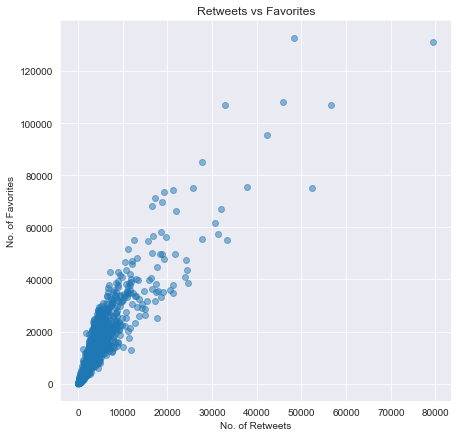

In [626]:
#Create a scatter plot b/w retweets and favorites 
sns.set_style('darkgrid')
plt.figure(figsize=(7,7));
plt.title('Retweets vs Favorites');
plt.scatter(df.retweets, df.favorites, alpha = 0.5);
plt.xlabel('No. of Retweets')
plt.ylabel('No. of Favorites')
plt.savefig('Retweets vs Favorites.png')
plt.show()

It can be clearly seen that there is a positive correlation between the number of retweets and no of times the tweet is  favorited. Majority of the data lies below 30000 retweets and 60000 favorites

In [627]:
# Create a new column dog rating
df['dog_rating'] = df['rating_numerator']/df['rating_denominator']

In [628]:
df['dog_rating'].describe()

count    2114.000000
mean     1.061226   
std      0.216800   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: dog_rating, dtype: float64

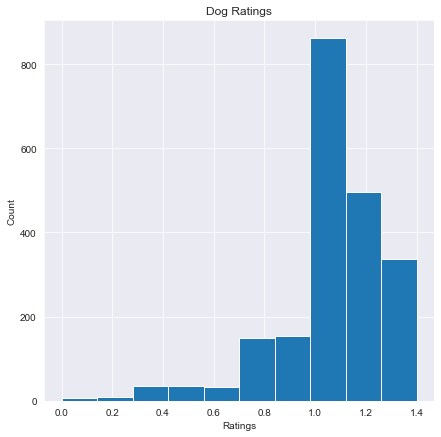

In [629]:
# Plotting the histogram of the dog_rating column
plt.figure(figsize=(7,7))
plt.hist(df['dog_rating'])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Dog Ratings')
plt.savefig('Dog Ratings.png')
plt.show()

We see that majority of the rating falls between 1 and 1.2 with the histogram being skewed to the left. 
As most of the dogs get 10s and 12s (https://knowyourmeme.com/memes/theyre-good-dogs-brent) this makes sense and we can conclude that they're 'Good dogs'

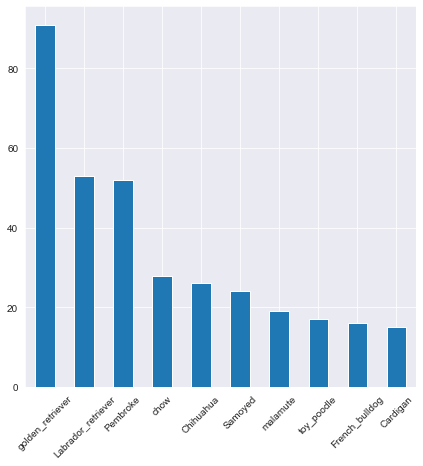

In [630]:
# Plotting a bar chart for the algorithm's #1 prediction(p1) for top 10 breeds from the top 1000 favorite posts 
plt.figure(figsize=(7,7))
df.nlargest(1000,'favorites')['p1'].value_counts().nlargest(10).plot(kind='bar', rot = 45);
plt.savefig('Favorites Bar.png');

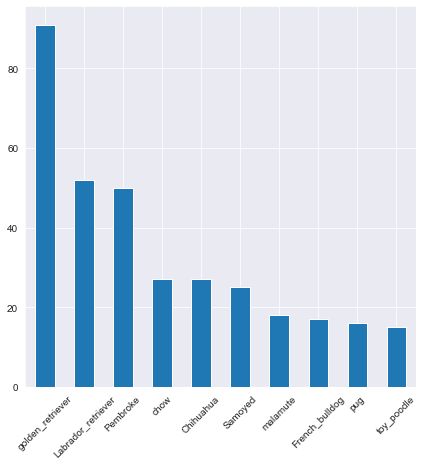

In [631]:
# Plotting a bar chart for the algorithm's #1 prediction(p1) for top 10 breeds from the top 1000 retweeted posts
plt.figure(figsize=(7,7))
df.nlargest(1000,'retweets')['p1'].value_counts().nlargest(10).plot(kind='bar', rot = 45);
plt.savefig('Retweets Bar.png')

It can be inferred from the data that the most favorited breed is golden retriever, followed by labrador and Pembroke while the most retweeted breed is also golden retriever followed by Pembroke and labrador. Chow, Chihuahua also seems to be one of the top 10 most favorited and retweeted dogs